In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [4]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit(X).transform(X)

In [6]:
pd.DataFrame(X_scaled)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state=0)

In [8]:
LR = LogisticRegression(C=0.1) ### C*A + B

In [9]:
LR.fit(X_train,y_train)

LogisticRegression(C=0.1)

In [10]:
LR.predict(X_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [11]:
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [12]:
LR.score(X_train,y_train)

0.9859154929577465

In [13]:
LR.score(X_test,y_test)

0.965034965034965

In [14]:
training_accuracy = []
testing_accuracy = []
regularizer = []

In [15]:
for i in range(1,101):
    C=i*0.01
    LR=LogisticRegression(C=C)
    LR.fit(X_train,y_train)
    
    regularizer.append(C)
    training_accuracy.append(LR.score(X_train,y_train))
    testing_accuracy.append(LR.score(X_test,y_test))

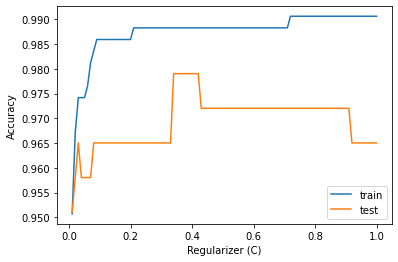

In [18]:
plt.plot(regularizer,training_accuracy)
plt.plot(regularizer,testing_accuracy)
plt.ylabel('Accuracy')
plt.xlabel('Regularizer (C)')
plt.legend(['train', 'test'], loc='lower right')   C*AX+B

keras = backend engine

keras <-- Tensorflow <--cuDA, cuDNN(GPU)

keras <-- Tensorflow <-- BLAS, Eigen (CPU)

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import L1L2
from keras import backend

In [23]:
model=Sequential()

In [25]:
input_shape=X.shape[1]

In [28]:
model.add(Dense(1,
                activation='sigmoid',
                kernel_regularizer = L1L2(l2=0.3),
                input_dim=input_shape))

In [29]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [30]:
model.fit(X_train,y_train,epochs=500)

Epoch 1/500
14/14 [==============================] - 2s 4ms/step - loss: 1.6284 - accuracy: 0.3709
Epoch 2/500
14/14 [==============================] - 0s 2ms/step - loss: 1.5086 - accuracy: 0.4202
Epoch 3/500
14/14 [==============================] - 0s 2ms/step - loss: 1.4002 - accuracy: 0.4554
Epoch 4/500
14/14 [==============================] - 0s 1ms/step - loss: 1.3029 - accuracy: 0.5305
Epoch 5/500
14/14 [==============================] - 0s 2ms/step - loss: 1.2133 - accuracy: 0.5986
Epoch 6/500
14/14 [==============================] - 0s 1ms/step - loss: 1.1340 - accuracy: 0.6549
Epoch 7/500
14/14 [==============================] - 0s 2ms/step - loss: 1.0650 - accuracy: 0.6901
Epoch 8/500
14/14 [==============================] - 0s 1ms/step - loss: 1.0025 - accuracy: 0.7277
Epoch 9/500
14/14 [==============================] - 0s 1ms/step - loss: 0.9462 - accuracy: 0.7535
Epoch 10/500
14/14 [==============================] - 0s 1ms/step - loss: 0.8963 - accuracy: 0.7840
Epoch 11/

14/14 [==============================] - 0s 1ms/step - loss: 0.3387 - accuracy: 0.9484
Epoch 84/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3386 - accuracy: 0.9507
Epoch 85/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3385 - accuracy: 0.9484
Epoch 86/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3383 - accuracy: 0.9484
Epoch 87/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3382 - accuracy: 0.9507
Epoch 88/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3381 - accuracy: 0.9507
Epoch 89/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3381 - accuracy: 0.9484
Epoch 90/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3379 - accuracy: 0.9484
Epoch 91/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3378 - accuracy: 0.9484
Epoch 92/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3378 - accuracy: 0.9460
Epoch 93/500


14/14 [==============================] - 0s 2ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 165/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 166/500
14/14 [==============================] - 0s 2ms/step - loss: 0.3369 - accuracy: 0.9413
Epoch 167/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3369 - accuracy: 0.9413
Epoch 168/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3369 - accuracy: 0.9413
Epoch 169/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 170/500
14/14 [==============================] - 0s 2ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 171/500
14/14 [==============================] - 0s 2ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 172/500
14/14 [==============================] - 0s 2ms/step - loss: 0.3369 - accuracy: 0.9413
Epoch 173/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 0.3371 - accuracy: 0.9413
Epoch 246/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 247/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 248/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3369 - accuracy: 0.9413
Epoch 249/500
14/14 [==============================] - 0s 2ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 250/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 251/500
14/14 [==============================] - 0s 2ms/step - loss: 0.3371 - accuracy: 0.9413
Epoch 252/500
14/14 [==============================] - 0s 2ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 253/500
14/14 [==============================] - 0s 3ms/step - loss: 0.3371 - accuracy: 0.9413
Epoch 254/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 327/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 328/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 329/500
14/14 [==============================] - 0s 2ms/step - loss: 0.3371 - accuracy: 0.9413
Epoch 330/500
14/14 [==============================] - 0s 2ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 331/500
14/14 [==============================] - 0s 2ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 332/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 333/500
14/14 [==============================] - 0s 2ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 334/500
14/14 [==============================] - 0s 2ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 335/500
14/14 [==============================] - 0s 2ms/step - loss: 0.3372 - accuracy: 0.9413
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 0.3371 - accuracy: 0.9413
Epoch 408/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3369 - accuracy: 0.9413
Epoch 409/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 410/500
14/14 [==============================] - 0s 2ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 411/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 412/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 413/500
14/14 [==============================] - 0s 2ms/step - loss: 0.3371 - accuracy: 0.9413
Epoch 414/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 415/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 416/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 489/500
14/14 [==============================] - 0s 2ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 490/500
14/14 [==============================] - 0s 2ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 491/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3369 - accuracy: 0.9413
Epoch 492/500
14/14 [==============================] - 0s 2ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 493/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 494/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 495/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3369 - accuracy: 0.9413
Epoch 496/500
14/14 [==============================] - 0s 2ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 497/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3371 - accuracy: 0.9437
Epoc

In [32]:
train_result = model.evaluate(X_train,y_train)
test_result = model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 1000us/step - loss: 0.3343 - accuracy: 0.9510


In [36]:
test_result[1]

0.9510489702224731

In [37]:
training_loss = []
testing_loss = []

training_accuracy = []
testing_accuracy = []
regularizer = []

In [40]:
for i in range(1,10):
    l2=i*0.01
    model=Sequential()
    input_shape=X.shape[1]
    
    model.add(Dense(1,
                activation='sigmoid',
                kernel_regularizer = L1L2(l2=l2),
                input_dim=input_shape))
    model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
    model.fit(X_train,y_train,epochs=500,verbose=0)
    train_result = model.evaluate(X_train,y_train,verbose=0)
    test_result = model.evaluate(X_test,y_test,verbose=0)
    

    regularizer.append(l2)
    training_loss.append(train_result[0])
    testing_loss.append(test_result[0])
    training_accuracy.append(train_result[1])
    testing_accuracy.append(test_result[1])

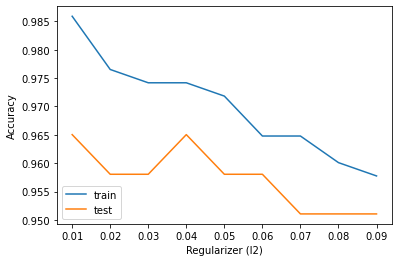

In [42]:
plt.plot(regularizer,training_accuracy)
plt.plot(regularizer,testing_accuracy)
plt.ylabel('Accuracy')
plt.xlabel('Regularizer (l2)')
plt.legend(['train', 'test'], loc='lower left')